In [4]:
!pip3 install tensorflow==2.15.0 tensorflow-probability==0.23.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 103.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 96.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: tensorflow-probability
    Found existing installation: tensorflow-probability 0.24.0
    Uninstalling tensorflow-probability-0.24.0:
      Successfully uninstalled tensorflow-probability-0.24.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0

In [5]:
!pip install gstools
!pip install deepxde

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.2/166.2 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.2/184.2 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 8.5 MB/s eta 0:00:00


In [6]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

from gstools import SRF, Gaussian
from gstools.random import MasterRNG

import deepxde as dde
from sklearn.model_selection import train_test_split

No backend selected.
Finding available backend...


Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.
Instructions for updating:
non-resource variables are not supported in the long term


Found tensorflow.compat.v1
Setting the default backend to "tensorflow.compat.v1". You can change it in the ~/.deepxde/config.json file or export the DDE_BACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle (all lowercase)


Enable just-in-time compilation with XLA.



In [7]:
mx = 15
mt = 50
n = 110

x_range = 1
y_range = 10

In [8]:
x = np.linspace(0, x_range, mx)
y = np.linspace(0, y_range, mt)

In [9]:
seed = MasterRNG(123)
def one_function(x):
  model = Gaussian(dim=1, var=50, len_scale=0.6)
  srf = SRF(model, seed=seed())
  f = srf.structured([x])
  return f

In [10]:
U_in = np.zeros((mx,n))
U = np.zeros((mx,mt,n))

for nn in range(n):
  x_values = one_function(x)
  U_in[:, nn] = x_values
  for tt in range(mt):
    U[:,tt,nn] = x_values

(15, 50)
(15, 50)


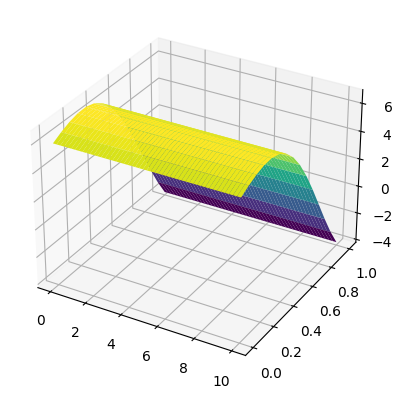

In [11]:
X, Y = np.meshgrid(y,x)
print(X.shape)
print(Y.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, U[:,:,10], cmap='viridis')

In [12]:
S = np.zeros((mx,mt,n))
S = U
dx = abs(x[0]-x[1])
dt = abs(y[0]-y[1])
alpha = 0.01

for d in range(n):
    for t in range(1, mt-1):
        for i in range(1,mx-1):
            S[i, t + 1, d] = U[i, t, d] + alpha * (U[i + 1, t, d] - 2 * U[i, t, d] + U[i - 1, t, d]) * (dt / dx**2)

(15, 50)
(15, 50)


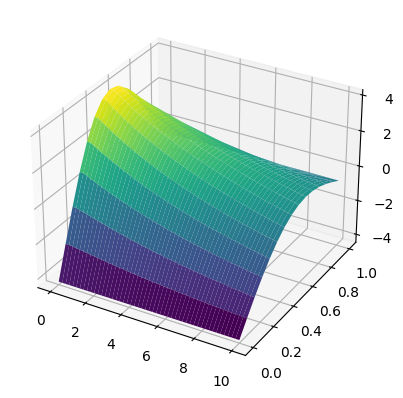

In [13]:
X, Y = np.meshgrid(y,x)
print(X.shape)
print(Y.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, S[:,:,3], cmap='viridis')

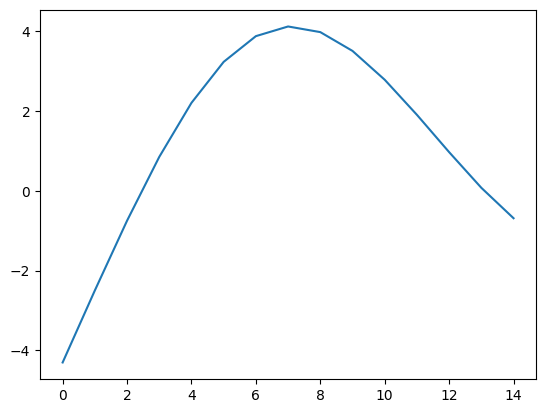

In [14]:
plt.plot(U_in[:,3])

In [15]:
x.shape, y.shape, S.shape, U_in.shape

((15,), (50,), (15, 50, 110), (15, 110))

In [16]:
combinations = []

for i in range(len(x)):
  for j in range(len(y)):
    combinations.append((x[i], y[j]))

combinations = np.array(combinations)
print(combinations.shape)
print(combinations)

(750, 2)
[[ 0.          0.        ]
 [ 0.          0.20408163]
 [ 0.          0.40816327]
 ...
 [ 1.          9.59183673]
 [ 1.          9.79591837]
 [ 1.         10.        ]]


In [17]:
x = combinations

In [18]:
x_space = np.linspace(0, x_range, mx)
y_space = np.linspace(0, y_range, mt)

In [19]:
def iterate_dataset(mx=mx, mt=mt, n=n, x=x, U_in=U_in, U=U, S=S):
  us = np.zeros((mx*mt*n, mx))
  xs = np.zeros((mx*mt*n, 2))
  ss = np.zeros((mx*mt*n, 1))
  count = 0
  for i in range(n):
    for j in range(mx):
      for k in range(mt):
        us[count, :] = U_in[:,i]
        xs[count] = [x_space[j], y_space[k]]
        ss[count] = S[j, k, i]
        count += 1
  return us, xs, ss

In [20]:
us, xs, ss = iterate_dataset()
us.shape, xs.shape, ss.shape

((82500, 15), (82500, 2), (82500, 1))

In [21]:
test_size = 0.2
us_train, us_test, xs_train, xs_test, ss_train, ss_test = train_test_split(us, xs, ss, test_size = test_size, random_state =42)

In [22]:
us_train.shape

(66000, 15)

In [23]:
us_test.shape

(16500, 15)

In [24]:
us_train.shape, us_test.shape,xs_train.shape,xs_test.shape,ss_train.shape,ss_test.shape

((66000, 15), (16500, 15), (66000, 2), (16500, 2), (66000, 1), (16500, 1))

In [25]:
type(ss_train)

numpy.ndarray

In [26]:
us_train = us_train.astype(np.float32)
us_test = us_test.astype(np.float32)

xs_train = xs_train.astype(np.float32)
xs_test = xs_test.astype(np.float32)

ss_train = ss_train.astype(np.float32)
ss_test = ss_test.astype(np.float32)

In [27]:
type(ss_train)

numpy.ndarray

In [28]:
X_train , y_train = (us_train,xs_train),ss_train
X_test , y_test = (us_test,xs_test),ss_test

In [29]:
data = dde.data.Triple(X_train=X_train,y_train=y_train, X_test=X_test, y_test=y_test)

Build our model

In [30]:
m = mx
dim_x = 2

net = dde.nn.DeepONet(
    [m,150,40],
    [dim_x,40,40],
    "relu",
    "Glorot normal",
)

In [31]:
model = dde.Model(data,net)

In [32]:
model.compile("adam", lr=0.001)

Compiling model...
Building DeepONet...
'build' took 0.060806 s



/usr/local/lib/python3.10/dist-packages/deepxde/nn/tensorflow_compat_v1/deeponet.py:416: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.529558 s



In [33]:
losshistory, train_state = model.train(iterations=13000)

Training model...

Step      Train loss    Test loss     Test metric
0         [2.14e+02]    [2.15e+02]    []  
1000      [5.98e-02]    [5.97e-02]    []  
2000      [3.60e-02]    [3.62e-02]    []  
3000      [2.62e-02]    [2.68e-02]    []  
4000      [1.80e-02]    [1.85e-02]    []  
5000      [1.38e-02]    [1.41e-02]    []  
6000      [1.11e-02]    [1.14e-02]    []  
7000      [9.40e-03]    [9.73e-03]    []  
8000      [7.45e-03]    [7.69e-03]    []  
9000      [3.06e-02]    [3.06e-02]    []  
10000     [6.52e-03]    [6.76e-03]    []  
11000     [4.89e-03]    [5.08e-03]    []  
12000     [4.31e-03]    [4.50e-03]    []  
13000     [5.49e-03]    [5.67e-03]    []  

Best model at step 12000:
  train loss: 4.31e-03
  test loss: 4.50e-03
  test metric: []

'train' took 77.179902 s



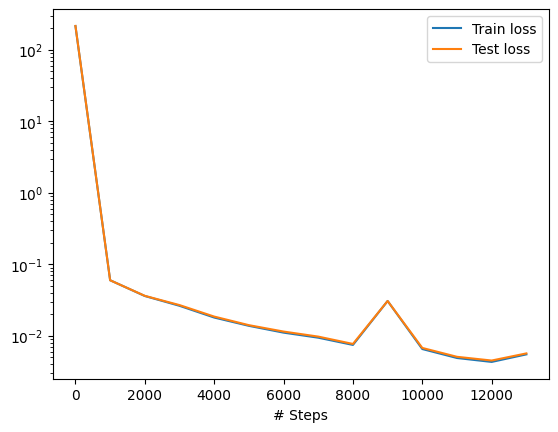

In [34]:
dde.utils.plot_loss_history(losshistory)

In [39]:
mx = 15
mt = 50
n = 110
x_range = 1
y_range = 10

In [40]:
x_gen = np.linspace(0, x_range, mx)
y_gen = np.linspace(0, y_range, mt)

In [41]:
seed = MasterRNG(321)
def one_function(x):
    model = Gaussian(dim=1, var=50, len_scale=0.6)
    srf= SRF(model, seed=seed())
    f = srf.structured([x])
    return f


In [42]:
UU_in = np.zeros((mx,n))
UU = np.zeros((mx,mt,n))

for nn in range(n):
    x_values = one_function(x_gen)
    UU_in[:,nn] = x_values
    for tt in range(mt):
        UU[:,tt,nn] = x_values

In [43]:
# change the number here if want to see more
target_result = 6
################################################


U_gen = UU_in[:,target_result]

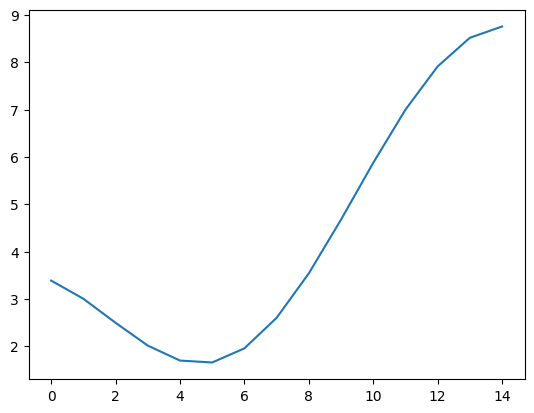

In [44]:
plt.plot(U_gen)

In [52]:
combinations = []

for i in range(len(x_gen)):
  for j in range(len(y_gen)):
    combinations.append((x_gen[i], y_gen[j]))

combinations = np.array(combinations)
print(combinations.shape)
print(combinations)

(750, 2)
[[ 0.          0.        ]
 [ 0.          0.20408163]
 [ 0.          0.40816327]
 ...
 [ 1.          9.59183673]
 [ 1.          9.79591837]
 [ 1.         10.        ]]


In [53]:
x =combinations

In [54]:
UU_in.shape, U_gen.shape

((15, 110), (15,))

In [56]:
array_length = mt*mx
U_gen_rep = np.vstack((U_gen,) * array_length)
print(U_gen_rep.shape)

(750, 15)


In [57]:
U_gen

array([3.39023063, 3.00614958, 2.49884366, 2.01685562, 1.7004847 ,
       1.66001438, 1.9586118 , 2.60277043, 3.5418805 , 4.67693546,
       5.87681001, 6.99926639, 7.91309245, 8.51767629, 8.75687956])

In [58]:
U_gen_rep

array([[3.39023063, 3.00614958, 2.49884366, ..., 7.91309245, 8.51767629,
        8.75687956],
       [3.39023063, 3.00614958, 2.49884366, ..., 7.91309245, 8.51767629,
        8.75687956],
       [3.39023063, 3.00614958, 2.49884366, ..., 7.91309245, 8.51767629,
        8.75687956],
       ...,
       [3.39023063, 3.00614958, 2.49884366, ..., 7.91309245, 8.51767629,
        8.75687956],
       [3.39023063, 3.00614958, 2.49884366, ..., 7.91309245, 8.51767629,
        8.75687956],
       [3.39023063, 3.00614958, 2.49884366, ..., 7.91309245, 8.51767629,
        8.75687956]])

In [61]:
result = model.predict((U_gen_rep, x))

In [62]:
result.shape

(750, 1)

In [63]:
result = result.reshape(mx,mt)

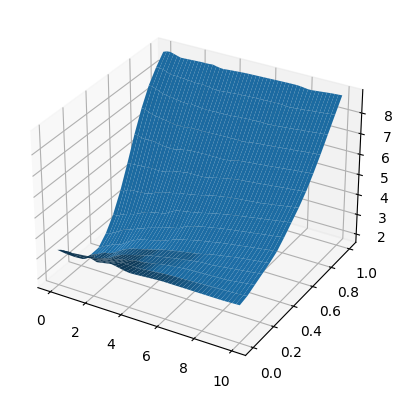

In [64]:
X, Y = np.meshgrid(y_gen,x_gen)
fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')
ax.plot_surface(X, Y, result)

In [65]:
S = np.zeros((mx,mt,n))
S = UU
dx = abs(x_gen[0]-x_gen[1])
dt = abs(y_gen[0]-y_gen[1])
alpha = 0.01

for d in range(n):
    for t in range(1, mt-1):
        for i in range(1,mx-1):
            S[i, t + 1, d] = UU[i, t, d] + alpha * (UU[i + 1, t, d] - 2 * UU[i, t, d] + UU[i - 1, t, d]) * (dt / dx**2)

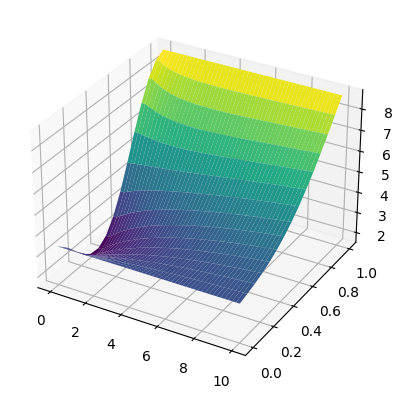

In [66]:
X, Y = np.meshgrid(y_gen,x_gen)
fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')
ax.plot_surface(X, Y, S[:,:,target_result], cmap='viridis')

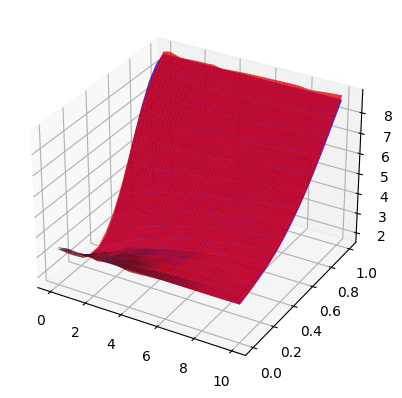

In [67]:
X, Y = np.meshgrid(y_gen,x_gen)

fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')

ax.plot_surface(X, Y, S[:,:,target_result], alpha=0.8, color = 'b')

ax.plot_surface(X, Y, result, alpha=0.8, color = 'r')

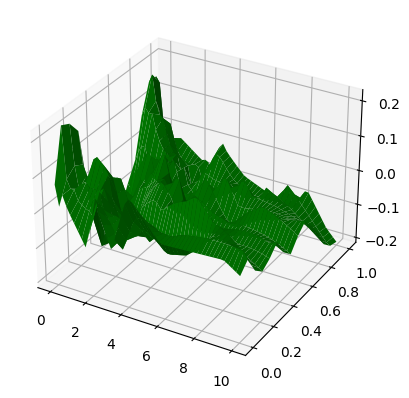

In [68]:
X, Y = np.meshgrid(y_gen,x_gen)

fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')

ax.plot_surface(X, Y, S[:,:,target_result]-result, alpha=1, color = 'g')